In [132]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

Load in the data set taken from kaggle

In [133]:
df = pd.read_csv('data/2021-2022 NBA Player Stats - Regular.csv', encoding="Windows-1252", delimiter=",")

df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


Load in data taken from NBA

Check for empty values for the kaggle data

In [134]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

Check for empty values for the nba data

Drop the columns with text values to make them easier to work with

In [135]:
df.drop("Tm", inplace=True, axis=1)
df.drop("Pos", inplace=True, axis=1)
#df.drop("index", inplace=True, axis=1)
df.reset_index()

,index,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1,Precious Achiuwa,22,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,1,2,Steven Adams,28,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,2,3,Bam Adebayo,24,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,3,4,Santi Aldama,21,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,4,5,LaMarcus Aldridge,36,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,807,601,Thaddeus Young,33,26,0,18.3,2.6,5.5,0.465,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,808,602,Trae Young,23,76,76,34.9,9.4,20.3,0.460,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,809,603,Omer Yurtseven,23,56,12,12.6,2.3,4.4,0.526,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,810,604,Cody Zeller,29,27,0,13.1,1.9,3.3,0.567,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


Remove duplicate players from Kaggle dataset by combining duplicate rows together and taking the mean of their values (rounded to as many decimal points as was in the values respective columns)

In [136]:
duplicate_count = {}
row_memory = {}
dup_list = df.duplicated(subset=['Player'], keep=False)

for index, row in df.iterrows():
    if not dup_list[index]:
        continue
    if row["Player"] not in row_memory:
        row_memory[row["Player"]] = row
        duplicate_count[row["Player"]] = 1
        continue
    row_memory[row["Player"]] = row_memory[row["Player"]] + row
    duplicate_count[row["Player"]] += 1

def get_row_mean(row, player):
    row["Rk"] /=   round(duplicate_count[player])
    row["Player"] = player
    row["Age"] = row["Age"] = row["Age"] / duplicate_count[player]
    row["G"] = round(row["G"] / duplicate_count[player])
    row["GS"] = round(row["GS"] / duplicate_count[player])
    row["MP"] = round(row["MP"] / duplicate_count[player], 1)
    row["FG"] = round(row["FG"] / duplicate_count[player], 1)
    row["FGA"] = round(row["FGA"] / duplicate_count[player], 1)
    row["FG%"] = round(row["FG%"] / duplicate_count[player], 3)
    row["3P"] = round(row["3P"] / duplicate_count[player], 1)
    row["3PA"] = round(row["3PA"] / duplicate_count[player], 1)
    row["3P%"] = round(row["3P%"] / duplicate_count[player], 1)
    row["2P"] = round(row["2P"] / duplicate_count[player], 1)
    row["2PA"] = round(row["2PA"] / duplicate_count[player], 1)
    row["2P%"] = round(row["2P%"] / duplicate_count[player], 3)
    row["eFG%"] = round(row["eFG%"] / duplicate_count[player], 3)
    row["FT"] = round(row["FT"] / duplicate_count[player], 1)
    row["FTA"] = round(row["FTA"] / duplicate_count[player], 1)
    row["FT%"] = round(row["FT%"] / duplicate_count[player], 3)
    row["ORB"] = round(row["ORB"] / duplicate_count[player], 1)
    row["DRB"] = round(row["DRB"] / duplicate_count[player], 1)
    row["TRB"] = round(row["TRB"] / duplicate_count[player], 1)
    row["AST"] = round(row["AST"] / duplicate_count[player], 1)
    row["STL"] = round(row["STL"] / duplicate_count[player], 1)
    row["BLK"] = round(row["BLK"] / duplicate_count[player], 1)
    row["TOV"] = round(row["TOV"] / duplicate_count[player], 1)
    row["PF"] = round(row["PF"] / duplicate_count[player], 1)
    row["PTS"] = round(row["PTS"] / duplicate_count[player], 1)

    return row

filtered_df = df[df.duplicated(subset=['Player'], keep=False) == False].reset_index(drop=True)

for player in row_memory.keys():
    new_row = get_row_mean(row_memory[player], player)
    temp_df = pd.DataFrame(new_row)
    filtered_df = pd.concat([filtered_df, temp_df.transpose()]).reset_index(drop=True)

filtered_df

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,22,73,28,23.6,3.6,8.3,0.439,0.8,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,28,76,75,26.3,2.8,5.1,0.547,0.0,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,24,56,56,32.6,7.3,13.0,0.557,0.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,21,32,0,11.3,1.7,4.1,0.402,0.2,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,36,47,12,22.3,5.4,9.7,0.55,0.3,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,572.0,Tremont Waters,24.0,2,0,15.2,1.3,4.2,0.345,0.6,...,0.0,0.0,1.1,1.1,1.9,1.6,0.0,1.1,1.4,3.1
601,578.0,Derrick White,27.0,50,35,29.0,4.4,10.4,0.419,1.5,...,0.862,0.5,3.0,3.5,4.7,0.8,0.8,1.5,2.3,12.9
602,593.0,Justise Winslow,25.0,32,7,18.6,2.8,6.6,0.427,0.4,...,0.587,1.2,3.5,4.7,2.0,0.9,0.5,1.0,1.5,6.9
603,599.0,Moses Wright,23.0,3,0,2.9,0.2,0.8,0.167,0.0,...,0.667,0.2,0.4,0.6,0.6,0.0,0.2,0.0,0.0,1.0


In [137]:
rk = df["Rk"]
large_value_columns = ["Rk", "Age", "G", "GS", "MP"]
low_value_df = df.drop(columns=large_value_columns, axis=1)
large_value_df = df[large_value_columns]

# Calculate the mean, median, and standard deviation for each variable in the low dataset
mean_low = low_value_df.mean(numeric_only=True)
median_low = low_value_df.median(numeric_only=True)
std_low = low_value_df.std(numeric_only=True)

# Calculate the mean, median, and standard deviation for each variable in the high dataset
mean_large = large_value_df.mean(numeric_only=True)
median_large = large_value_df.median(numeric_only=True)
std_large = large_value_df.std(numeric_only=True)

# Create a bar chart to visualize the mean, median, and standard deviation
fig_low = go.Figure(data=[
    go.Bar(name='Mean', x=mean_low.index, y=mean_low.values),
    go.Bar(name='Median', x=median_low.index, y=median_low.values),
    go.Bar(name='Standard Deviation', x=std_low.index, y=std_low.values)
])

# Add a title and axis labels to the chart
fig_low.update_layout(
    title="",#'Mean, Median, and Standard Deviation for the small-value variables in the\n NBA player dataset',
    xaxis_title='Variable',
    yaxis_title='Value'
)

# Create a bar chart to visualize the mean, median, and standard deviation
fig_large = go.Figure(data=[
    go.Bar(name='Mean', x=mean_large.index, y=mean_large.values),
    go.Bar(name='Median', x=median_large.index, y=median_large.values),
    go.Bar(name='Standard Deviation', x=std_large.index, y=std_large.values)
])

# Add a title and axis labels to the chart
fig_large.update_layout(
    title="",#'Mean, Median, and Standard Deviation for the small-value variables in the\n NBA player dataset',
    xaxis_title='Variable',
    yaxis_title='Value'
)


# Show the chart
fig_low.show()
fig_low.write_image("figures/low-values.pdf", format="pdf")
fig_large.show()
fig_large.write_image("figures/large-values.pdf", format="pdf")

Remove the player names now that duplicates have been removed

In [138]:
df.drop("Player", inplace=True, axis=1)
df.reset_index()

,index,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1,22,73,28,23.6,3.6,8.3,0.439,0.8,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,1,2,28,76,75,26.3,2.8,5.1,0.547,0.0,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,2,3,24,56,56,32.6,7.3,13.0,0.557,0.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,3,4,21,32,0,11.3,1.7,4.1,0.402,0.2,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,4,5,36,47,12,22.3,5.4,9.7,0.550,0.3,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,807,601,33,26,0,18.3,2.6,5.5,0.465,0.7,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,808,602,23,76,76,34.9,9.4,20.3,0.460,3.1,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,809,603,23,56,12,12.6,2.3,4.4,0.526,0.0,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,810,604,29,27,0,13.1,1.9,3.3,0.567,0.0,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


Check the correlation between all columns (Pearson correlation coefficient)

In [139]:
corr_matrix = df.corr()
corr_matrix

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.037216,-0.066503,-0.086550,-0.050971,-0.057393,-0.054080,-0.001554,-0.052654,-0.052840,...,-0.017262,-0.030168,-0.079571,-0.070434,0.006615,-0.015441,-0.017137,-0.020534,0.000567,-0.057467
Age,-0.037216,1.000000,0.042212,0.052232,0.145388,0.087947,0.085564,0.059665,0.121144,0.104885,...,0.075038,0.014226,0.124140,0.099501,0.171731,0.072693,0.038176,0.096063,0.127838,0.094685
G,-0.066503,0.042212,1.000000,0.680436,0.620290,0.563977,0.542432,0.311718,0.475981,0.457740,...,0.468275,0.293125,0.517411,0.487806,0.387040,0.424368,0.336577,0.424739,0.470319,0.559330
GS,-0.086550,0.052232,0.680436,1.000000,0.751435,0.736394,0.713715,0.226771,0.530903,0.524531,...,0.288935,0.354654,0.656365,0.612579,0.563921,0.521898,0.408970,0.617675,0.538844,0.732292
MP,-0.050971,0.145388,0.620290,0.751435,1.000000,0.886895,0.898603,0.299632,0.720450,0.732635,...,0.496879,0.357061,0.756131,0.688470,0.728131,0.717810,0.447035,0.771405,0.743587,0.887411
FG,-0.057393,0.087947,0.563977,0.736394,0.886895,1.000000,0.970853,0.355639,0.679117,0.680076,...,0.425511,0.383116,0.764754,0.703036,0.707715,0.617590,0.447414,0.811092,0.651883,0.989932
FGA,-0.054080,0.085564,0.542432,0.713715,0.898603,0.970853,1.000000,0.211332,0.764839,0.794470,...,0.437638,0.257649,0.697697,0.612265,0.744193,0.637838,0.358791,0.824847,0.616042,0.975918
FG%,-0.001554,0.059665,0.311718,0.226771,0.299632,0.355639,0.211332,1.000000,0.053493,-0.018902,...,0.260330,0.436072,0.372291,0.421290,0.109928,0.171141,0.387849,0.199539,0.395070,0.313305
3P,-0.052654,0.121144,0.475981,0.530903,0.720450,0.679117,0.764839,0.053493,1.000000,0.969827,...,0.436182,-0.115142,0.359467,0.237293,0.539793,0.506564,0.092254,0.540044,0.381334,0.729547
3PA,-0.052840,0.104885,0.457740,0.524531,0.732635,0.680076,0.794470,-0.018902,0.969827,1.000000,...,0.415277,-0.127942,0.369933,0.241032,0.564140,0.518342,0.087548,0.572415,0.386590,0.728704


Visualize the correlation

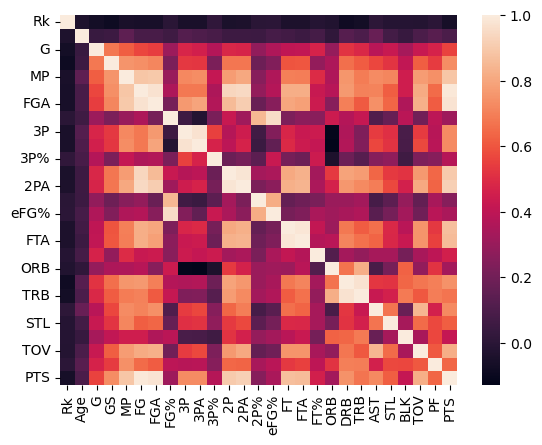

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix)
plt.savefig("figures/heatmap.pdf")
plt.show()

Scatterplot all correlations > 0.7

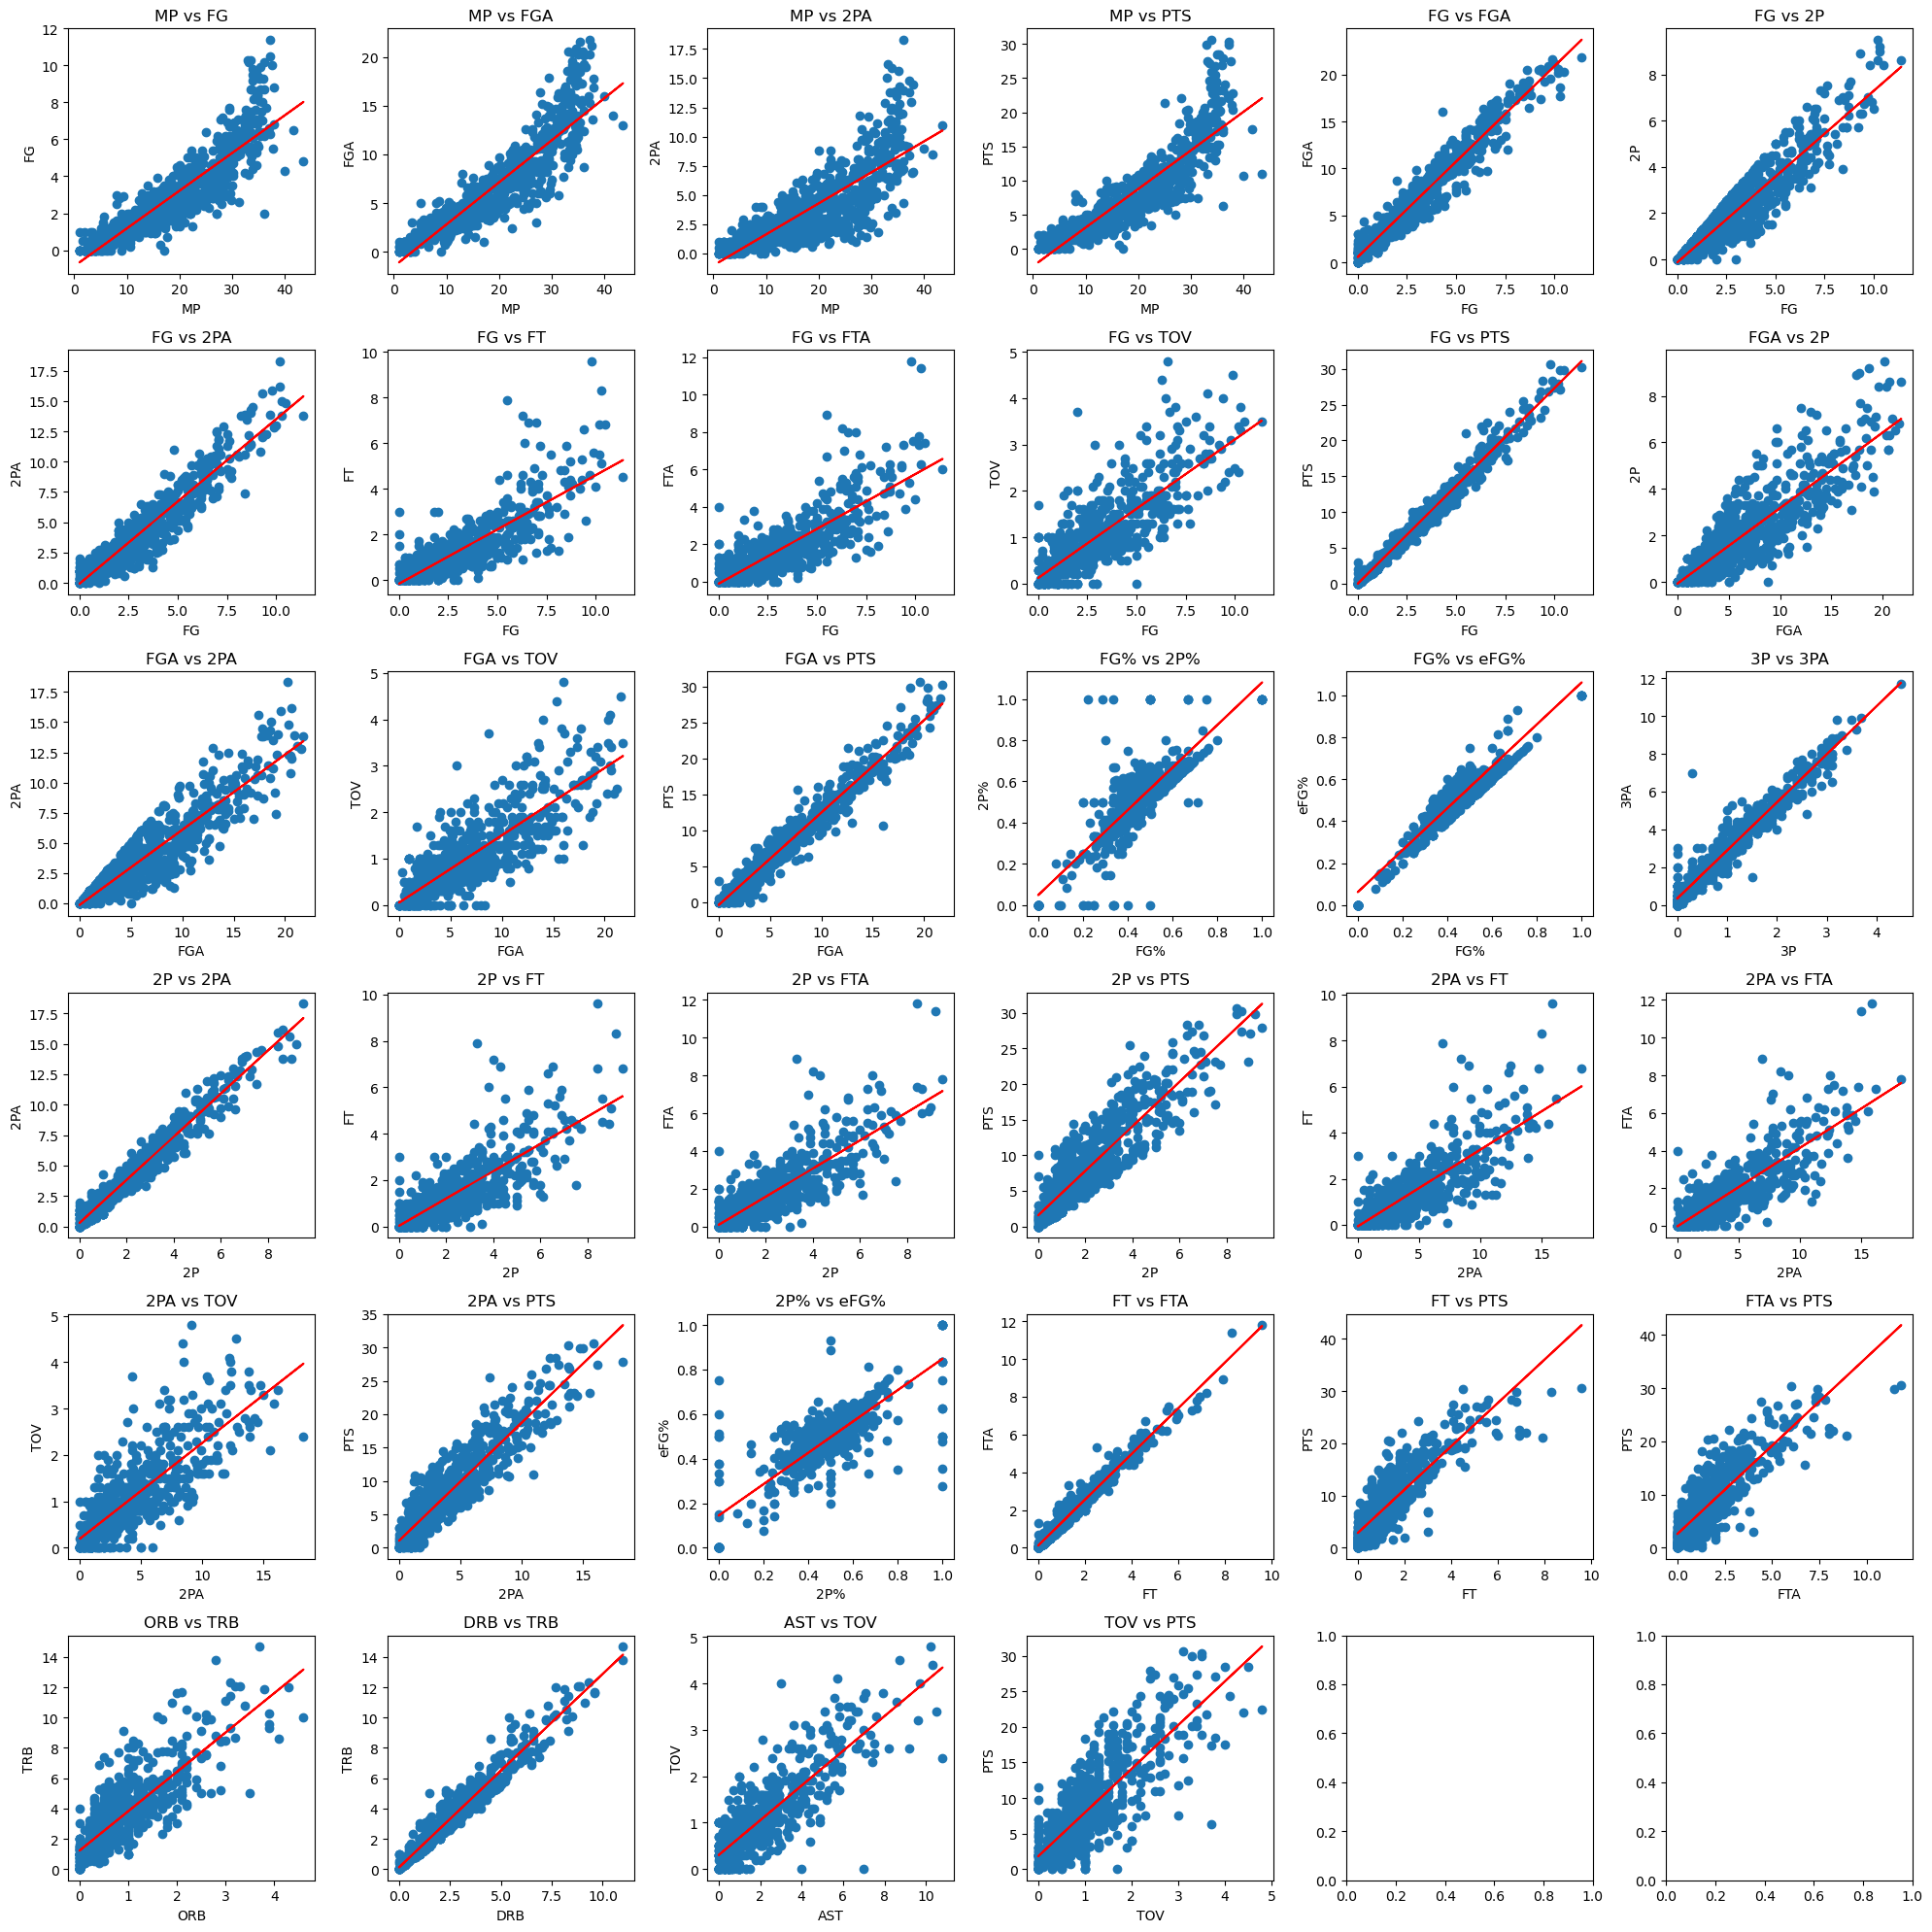

In [141]:
import math
# Get the absolute value of the correlation matrix
abs_corr_matrix = np.abs(corr_matrix)


corr_pairs = np.where(abs_corr_matrix > 0.8)
corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*corr_pairs) if x != y and x < y]

n = len(corr_pairs)
subplots_rows = math.ceil(math.sqrt(n))
subplots_cols = math.ceil(n / subplots_rows)

fig, ax = plt.subplots(subplots_rows, subplots_cols, figsize=(20, 20))
for i, pair in enumerate(corr_pairs):
    x = df[pair[0]]
    y = df[pair[1]]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[i//subplots_cols][i%subplots_cols].scatter(x, y)
    ax[i//subplots_cols][i%subplots_cols].plot(x,p(x),"r")
    ax[i//subplots_cols][i%subplots_cols].set_title(f'{pair[0]} vs {pair[1]}')
    ax[i//subplots_cols][i%subplots_cols].set_xlabel(f'{pair[0]}')
    ax[i//subplots_cols][i%subplots_cols].set_ylabel(f'{pair[1]}')
    plt.tight_layout()

plt.savefig("figures/scatter3.pdf")
plt.show()



Get the p-values

In [142]:
#import scipy.stats as ss
from scipy.stats import pearsonr

corr_table = []

for pair in corr_pairs:
    column1 = pair[0]
    column2 = pair[1]
    corr, p_value = pearsonr(df[column1], df[column2])
    corr_table.append([column1, column2, corr, p_value])

corr_table_df = pd.DataFrame(corr_table, columns=['Column 1', 'Column 2', 'Correlation', 'P-value'])
print(corr_table_df)


   Column 1 Column 2  Correlation        P-value
0        MP       FG     0.886895  6.873821e-274
1        MP      FGA     0.898603  5.010737e-292
2        MP      2PA     0.803061  2.699052e-184
3        MP      PTS     0.887411  1.203556e-274
4        FG      FGA     0.970853   0.000000e+00
5        FG       2P     0.936068   0.000000e+00
6        FG      2PA     0.944519   0.000000e+00
7        FG       FT     0.820781  3.614445e-199
8        FG      FTA     0.820764  3.743640e-199
9        FG      TOV     0.811092  7.685264e-191
10       FG      PTS     0.989932   0.000000e+00
11      FGA       2P     0.858461  4.226629e-237
12      FGA      2PA     0.907912  4.153379e-308
13      FGA      TOV     0.824847  8.167111e-203
14      FGA      PTS     0.975918   0.000000e+00
15      FG%      2P%     0.849532  3.489085e-227
16      FG%     eFG%     0.953627   0.000000e+00
17       3P      3PA     0.969827   0.000000e+00
18       2P      2PA     0.978720   0.000000e+00
19       2P       FT

Try do do a preditive model for how many points will be scored

In [143]:
unneccessary_columns = ['FG', 'FG%', '3P', '3PA', '3P%', '2P', '2P%', 'eFG%', "FT%", "FT"]
df.drop(unneccessary_columns, inplace=True, axis=1)
df.reset_index()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split the data into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=["PTS"]), df["PTS"], test_size=0.2)

# Create a linear regression model
reg = LinearRegression()

# Use RFE to select the best features for the model
rfe = RFE(reg)
rfe = rfe.fit(X_train, Y_train)

# Use the selected features to train the model
reg.fit(X_train[X_train.columns[rfe.support_]], Y_train)

# Evaluate the accuracy of the model
accuracy = reg.score(X_test[X_test.columns[rfe.support_]], Y_test)
print("accuracy = ", accuracy)

selected_features = X_train.columns[rfe.support_]
print("Selected features: ", selected_features)

# Use the selected features to fit a linear regression model
X_selected = X_test[selected_features]

print(X_selected)

# Get the predicted values for the selected features
y_pred = reg.predict(X_selected)

# Create a scatter plot of the observed values and the predicted values
fig = px.scatter(x=Y_test, y=y_pred, title="Observed vs Predicted Values")
fig.add_shape(
    type='line', x0=0, y0=0, x1=np.max(Y_test), y1=np.max(Y_test), 
    xref='x', yref='y', line=dict(color="red")
)
fig.show()
fig.write_image("figures/regression.pdf", format="pdf")


accuracy =  0.9821714242756275
Selected features:  Index(['FGA', '2PA', 'FTA', 'TRB', 'STL', 'BLK', 'TOV', 'PF'], dtype='object')
      FGA  2PA  FTA  TRB  STL  BLK  TOV   PF
579   1.9  0.8  0.2  0.5  0.1  0.0  0.3  0.5
577   3.0  1.0  0.0  1.0  0.0  0.0  1.0  2.0
555   6.7  4.1  1.5  2.0  0.4  0.2  0.6  1.2
386  10.0  6.0  1.4  2.7  1.0  0.5  1.8  2.2
573   0.6  0.1  0.1  0.4  0.0  0.0  0.1  0.4
..    ...  ...  ...  ...  ...  ...  ...  ...
278  12.4  7.2  3.3  4.3  1.8  0.6  3.2  1.9
502   3.2  1.9  0.6  1.5  0.9  0.2  0.6  0.9
162   8.9  3.9  1.5  3.1  0.8  0.4  1.1  2.3
87    1.7  0.7  0.0  0.3  0.7  0.3  0.0  0.7
457   5.5  5.4  1.5  3.5  0.1  0.5  1.2  1.9

[163 rows x 8 columns]
